<p style="
    color:black;
    text-align: center;
    font-size:20px;
    font-weight:900;font-family: Times New Roman;">Institut supérieur de l'informatique et des technologies de la communication</p>
    
  <p style="
    padding:30px;
    color:black;
    text-align: center;
    font-size:50px;
    font-weight:500; border: 1px solid black;border-bottom: 8px solid black;margin-bottom:100px;">TP N°2 : Segmentation</p>
    
<p style="
    color:black;
    text-align: center;
    font-size:20px;
    font-weight:900;font-family: Times New Roman;">Ghada GHANNEY</p>
<p style="
    color:black;
    text-align: center;
    font-weight:500;"><span style="
    color:black;
     font-size:20px;
    text-align: center;
    font-weight:500;">  3 DNI Groupe 2    </span> </p>
    


<h4 style ="color : #102952 ; font-size: 30px; font-weight:900;  text-align: left;border-bottom: 0.5px solid #102952"> I - Objectifs </h4>

- Les objectifs de ce TP sont : 
    * __Essayer la segmentation d'une image__
    
    * __Ajouter plusieurs types de bruits sur une image__
    
    * __Débruiter l'image__ 

<h4 style ="color : #102952 ; font-size: 30px; font-weight:900;  text-align: left;border-bottom: 0.5px solid #102952"> II : Partie Théorique </h4>

<h3 style ="margin-left:40px;color : font-size: 20px; font-weight:900"> 1 - C'est quoi une Ségmentation d'image ?</h3>

- La segmentation d'image est un processus critique de la vision par ordinateur. Il s'agit de diviser une entrée visuelle en segments pour simplifier l'analyse d'image. 
- Les segments représentent des objets ou des parties d'objets et comprennent des ensembles de pixels, ou «super-pixels». La segmentation d'image trie les pixels en composants plus grands, éliminant ainsi le besoin de considérer les pixels individuels comme des unités d'observation.

<h3 style ="margin-left:50px;color :font-size: 20px; font-weight:900"> 2 - Niveaux d'analyse d'image </h3>

- ___Classification :___ catégorisation de l'image entière dans une classe telle que «personnes», «animaux», «à l'extérieur»
- ___Détection d'objets :___  détecter des objets dans une image et dessiner un rectangle autour d'eux, par exemple, une personne ou un mouton.
- ___Segmentation :___  identifier les parties de l'image et comprendre à quel objet elles appartiennent. La segmentation jette les bases de la détection et de la classification d'objets.

<h3 style ="margin-left:50px;color : font-size: 20px; font-weight:900">3 - Comment Appliquer la segmentation d'image ? </h3>

<h2 style ="margin-left:80px;color :#eb4034 ; font-size: 18px; font-weight:900;"> A. Applications de segmentation d'image : </h2>
<p style ="margin-left:80px"><b><i> - Détection de visage :</i></b> un type de détection de classe d'objets avec de nombreuses applications, y compris la biométrie et les fonctions de mise au point automatique dans les appareils photo numériques. </p>
<p style ="margin-left:80px"><b><i> - Imagerie médicale :</i></b> extrait les informations cliniquement pertinentes des images médicales. </p>
<p style ="margin-left:80px"><b><i> - Vision industrielle :</i></b> applications qui capturent et traitent des images pour fournir des conseils opérationnels aux appareils. </p>

<h2 style ="margin-left:80px;color :#eb4034 ; font-size: 18px; font-weight:900;"> B. Surveillance vidéo : </h2>
<p style ="margin-left:80px"><b><i> - Véhicules autonomes :</i></b> les voitures autonomes doivent être capables de percevoir et de comprendre leur environnement afin de conduire en toute sécurité. </p>
<p style ="margin-left:80px"><b><i> - Reconnaissance de l'iris :</i></b> une forme d'identification biométrique qui reconnaît les motifs complexes d'un iris. </p>
<p style ="margin-left:80px"><b><i> - Reconnaissance faciale :</i></b> identifie un individu dans une image à partir d'une source vidéo. </p>

<h3 style ="margin-left:50px;color :font-size: 20px; font-weight:900"> 4 - K-means clustering </h3>

- Le partitionnement en k-moyennes (ou k-means en anglais) est une méthode de partitionnement de données et un problème d'optimisation combinatoire. Étant donnés des points et un entier k, le problème est de diviser les points en k groupes, souvent appelés clusters, de façon à minimiser une certaine fonction. On considère la distance d'un point à la moyenne des points de son cluster ; la fonction à minimiser est la somme des carrés de ces distances.

- Il existe une heuristique classique pour ce problème, souvent appelée méthodes des k-moyennes, utilisée pour la plupart des applications. Le problème est aussi étudié comme un problème d'optimisation classique, avec par exemple des algorithmes d'approximation.

<h4 style ="color : #102952 ; font-size: 30px; font-weight:900;  text-align: left;border-bottom: 0.5px solid #102952"> III : Partie Pratique </h4>

In [30]:
#Importation des bibliothèques 

import numpy as np                          # numpy: Permet d’effectuer des calculs numériques avec Python. Elle introduit une gestion facilitée des tableaux de nombres.
from sklearn.cluster import KMeans          # KMeans: Permet d'appliquer algorithme kmeans-clustering.
from sklearn.cluster import MiniBatchKMeans # MiniBatchKMeans: Permet d'appliquer algorithme Mini-Batch K-Means clustering.
import skimage.io                           # skimage.io : Permet de lire et écrire des images dans différents formats.
import skimage.io
import matplotlib.pyplot as plt             # C'est une collection de fonctions qui font fonctionner matplotlib comme MATLAB. Chaque fonction pyplot modifie une figure: par exemple, crée une figure, crée une zone de traçage dans une figure, trace des lignes dans une zone de traçage, décore le tracé avec des étiquettes, etc.
import cv2                                  # cv2 : Permet le traitement d’images, que ce soit pour de la photo ou de la vidéo.
import matplotlib.image as mpimg            # Permet de lire une image d'un fichier dans un tableau

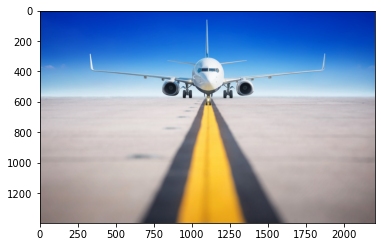

In [31]:
#Afficher l'image originale avec mpimg.imread()

img_orig = mpimg.imread('plane1.jpg')
imgplot = plt.imshow(img_orig)
plt.show()

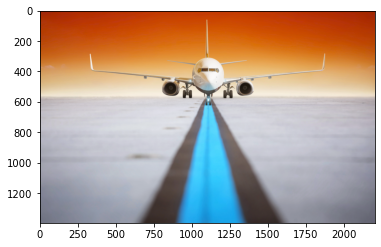

In [32]:
# Afficher l'image originale avec mpimg.imread()

image = cv2.imread('plane1.jpg') # charger une image à partir du fichier spécifié. 
                                 # Si l'image ne peut pas être lue (en raison d'un fichier manquant, d'autorisations incorrectes, 
                                 # d'un format non pris en charge ou non valide), cette méthode renvoie une matrice vide.
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

# Performs k-means clustering on the colors in the image
clt = KMeans(n_clusters = 2)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('plane2.jpg', quant)
plt.imshow(image)

cv2.imread('plane1.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

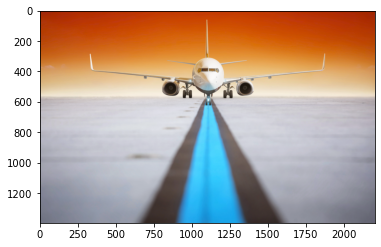

In [33]:
plt.imshow(image)

In [34]:
!pip install opencv-python

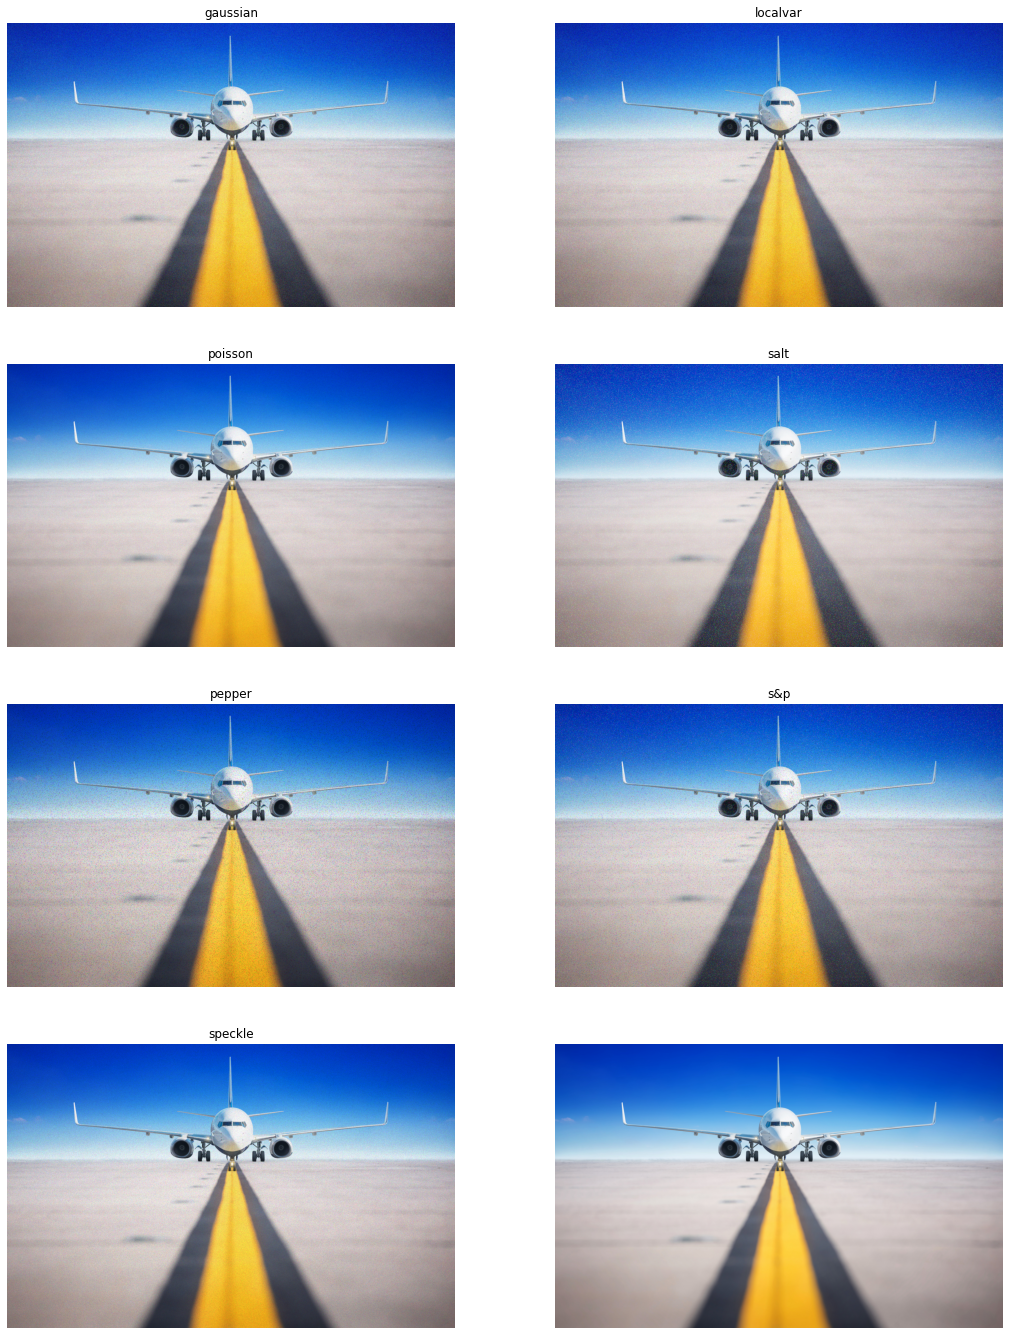

In [35]:
import skimage.io
import matplotlib.pyplot as plt
img_path="plane1.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


___- Fonction interact :___ 

ipywidgets.interact) crée automatiquement des commandes d'interface utilisateur (UI) pour explorer le code et les données de manière interactive. C'est le moyen le plus simple de commencer à utiliser les widgets IPython.

In [36]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interactive

img_path='plane1.jpg'
img = skimage.io.imread(img_path)/255.0
def f(mode):
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
interact(f,mode=['gaussian','localvar','poisson','salt','pepper','s&p','speckle',None]);

interactive(children=(Dropdown(description='mode', options=('gaussian', 'localvar', 'poisson', 'salt', 'pepper…